<a href="https://colab.research.google.com/github/Selviani20/UMP_GK_PENGHASILAN/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LATAR BELAKANG :**

Negara Indonesia merupakan negara kepulauan terbesar di dunia. Hal ini membuat Indonesia memiliki beberapa daerah dengan karakteristiknya berbeda-beda. Dengan hal ini terdapat perbedaan signifikan dalam upah minimum antar provinsi dan jenis daerah yang dapat mempengaruhi tingkat kemiskinan secara langsung. Penelitian ini memfokuskan pada periode 2018-2022 untuk menganalisis bagaimana fluktuasi Upah Minimum Provinsi (UMP) dan garis kemiskinan berhubungan di berbagai provinsi. Mengingat bahwa garis kemiskinan dan UMP dapat bervariasi secara regional, sehingga penting untuk mengeksplorasi dampak perbedaan ini terhadap kesejahteraan ekonomi masyarakat. Dengan membandingkan data UMP dan garis kemiskinan dari berbagai provinsi, penelitian ini bertujuan untuk memberikan wawasan yang lebih mendalam mengenai dinamika ekonomi regional dan kontribusinya terhadap penanggulangan kemiskinan.

**TUJUAN PENELITIAN:**

Dengan memiliki beberapa daerah di negara Indonesia, maka dalam penelitian ini ingin menganalisis hubungan antara Upah Minimum Provinsi (UMP) dan garis kemiskinan di berbagai provinsi serta jenis daerah di Indonesia selama periode 2018-2022. Selain itu, dapat mengevaluasi dampak perubahan UMP terhadap garis kemiskinan dan mengidentifikasi tren serta kesenjangan sosial-ekonomi yang ada di negara Indonesia dalam periode 2018-2022.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install gspread oauth2client

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
from gspread_dataframe import get_as_dataframe

# Autentikasi pengguna
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)

In [ ]:
# Masukkan ID spreadsheet Anda di sini
spreadsheet_id = '1ZPJusNceDCy1i5Nq1FoXJNvT8gwL3s5w_9G9xhEfarQ'

# Buka spreadsheet
sheet = client.open_by_key(spreadsheet_id).sheet1
df = get_as_dataframe(sheet)
df

,PROVINSI,JENIS,DAERAH,TAHUN,GK,PENG,UMP,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,ACEH,MAKANAN,PERDESAAN,2018,716378,506656,2700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACEH,NONMAKANAN,PERDESAAN,2018,205603,331248,2700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEH,TOTAL,PERDESAAN,2018,921982,837905,2700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACEH,MAKANAN,PERDESAAN & PERKOTAAN,2018,715126,547668,2700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACEH,NONMAKANAN,PERDESAAN & PERKOTAAN,2018,226165,426149,2700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,SUMATERA UTARA,NONMAKANAN,PERDESAAN & PERKOTAAN,2022,280646,552569,2522610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526,SUMATERA UTARA,TOTAL,PERDESAAN & PERKOTAAN,2022,1153029,1216496,2522610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,SUMATERA UTARA,MAKANAN,PERKOTAAN,2022,889677,689463,2522610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,SUMATERA UTARA,NONMAKANAN,PERKOTAAN,2022,308770,668871,2522610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus kolom yang seluruhnya NaN
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned

,PROVINSI,JENIS,DAERAH,TAHUN,GK,PENG,UMP
0,ACEH,MAKANAN,PERDESAAN,2018,716378,506656,2700000
1,ACEH,NONMAKANAN,PERDESAAN,2018,205603,331248,2700000
2,ACEH,TOTAL,PERDESAAN,2018,921982,837905,2700000
3,ACEH,MAKANAN,PERDESAAN & PERKOTAAN,2018,715126,547668,2700000
4,ACEH,NONMAKANAN,PERDESAAN & PERKOTAAN,2018,226165,426149,2700000
...,...,...,...,...,...,...,...
1525,SUMATERA UTARA,NONMAKANAN,PERDESAAN & PERKOTAAN,2022,280646,552569,2522610
1526,SUMATERA UTARA,TOTAL,PERDESAAN & PERKOTAAN,2022,1153029,1216496,2522610
1527,SUMATERA UTARA,MAKANAN,PERKOTAAN,2022,889677,689463,2522610
1528,SUMATERA UTARA,NONMAKANAN,PERKOTAAN,2022,308770,668871,2522610


 Data yang digunakan dalam analisis ini yaitu data terkait dengan Garis kemiskinan , Pengeluaran dan UMP disetiap daerah di Negara Indonesia yang diambil dari platform online. Dari hasil tersebut dapat diketahui bahwa data ini terdapat 7 kolom yang terdiri dari nama provinsi, jenis, derah, tahun , garis kemiskinan , pengeluaran dan UMP pada tahun 2018-2022. Selain itu juga terdapat 1530 baris yang akan dianalisis dalam penelitian ini.


In [ ]:
# Mengambil deskripsi statistik untuk beberapa kolom
df_cleaned[['GK', 'PENG', 'UMP']].describe()

,GK,PENG,UMP
count,1.530000e+03,1.530000e+03,1.530000e+03
mean,6.566049e+05,8.169614e+05,2.562223e+06
std,3.492527e+05,3.754737e+05,5.535272e+05
min,0.000000e+00,0.000000e+00,1.454154e+06
25%,2.900942e+05,5.485880e+05,2.207212e+06
50%,6.952465e+05,7.081605e+05,2.532971e+06
75%,9.062912e+05,1.028613e+06,2.916810e+06
max,1.693386e+06,2.525347e+06,4.641854e+06


In [ ]:
print(df_cleaned.dtypes)

PROVINSI    object
JENIS       object
DAERAH      object
TAHUN        int64
GK           int64
PENG         int64
UMP          int64
dtype: object


In [ ]:
# Ubah kolom ke numerik, dengan mengabaikan kesalahan
df['GK'] = pd.to_numeric(df['GK'], errors='coerce')
df['PENG'] = pd.to_numeric(df['PENG'], errors='coerce')
df['UMP'] = pd.to_numeric(df['UMP'], errors='coerce')

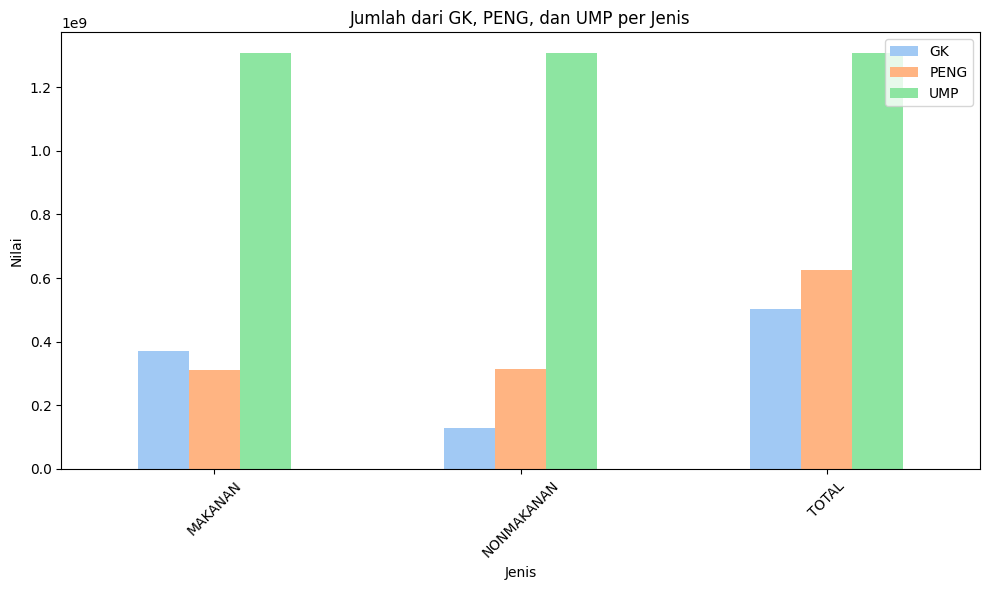

In [ ]:
# Grouping dan menghitung jumlah
grouped = df.groupby('JENIS').sum()

# Set palet warna dari seaborn
sns.set_palette('pastel')  # Pilih palet pastel untuk warna lembut

# Plot grafik batang
fig, ax = plt.subplots(figsize=(10, 6))
grouped[['GK', 'PENG', 'UMP']].plot(kind='bar', ax=ax)

ax.set_title('Jumlah dari GK, PENG, dan UMP per Jenis')
ax.set_ylabel('Nilai')
ax.set_xlabel('Jenis')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Dari hasil grafik diatas diketahui bahwa GK (Garis Kemiskinan) jauh lebih rendah daripada UMP, ini menunjukkan bahwa upah minimum mungkin cukup untuk memenuhi kebutuhan dasar di semua jenis kebutuhannya dan dapat menunjukkan bahwa kebijakan upah minimum mungkin efektif dalam memenuhi kebutuhan dasar di setiap provinsi. Namun untuk pengeluaran lebih tinggi dibandingkan GK di jenis makanan dan nonmakanan artinya hal ini menunjukkan bahwa masyarakat memiliki daya beli yang lebih baik daripada hanya memenuhi kebutuhan dasar. Namun, penting untuk menggunakan hasil ini sebagai dasar untuk evaluasi lebih lanjut dari kebijakan sosial dan ekonomi serta untuk mempertimbangkan penyesuaian garis kemiskinan untuk mencerminkan kebutuhan dan kondisi nyata masyarakat.

In [ ]:
# Pastikan kolom TAHUN bertipe integer
df_cleaned['TAHUN'] = df_cleaned['TAHUN'].astype(int)
print(df_cleaned['TAHUN'].dtype)
print(df_cleaned['TAHUN'].unique())

int64
[2018 2019 2020 2021 2022]


<ipython-input-10-c4bfc721d951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TAHUN'] = df_cleaned['TAHUN'].astype(int)


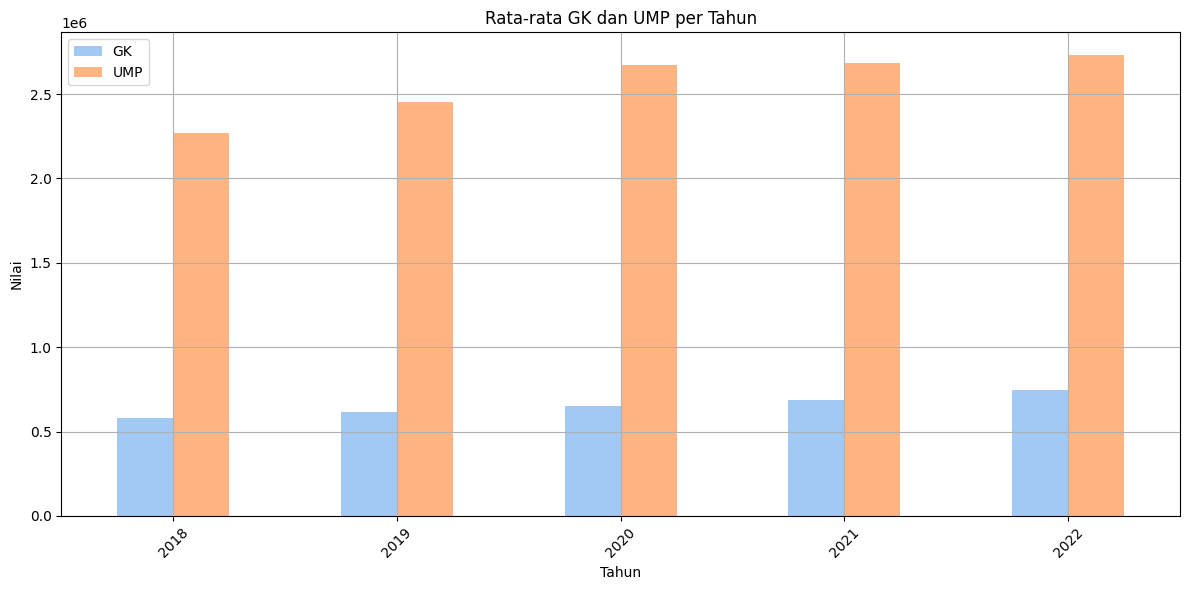

In [ ]:
# Plot Grafik Batang
fig, ax = plt.subplots(figsize=(12, 6))
df_cleaned.groupby('TAHUN')[['GK', 'UMP']].mean().plot(kind='bar', ax=ax)
ax.set_title('Rata-rata GK dan UMP per Tahun')
ax.set_ylabel('Nilai')
ax.set_xlabel('Tahun')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung koefisien korelasi
correlation = df_cleaned[['GK', 'UMP']].corr().iloc[0, 1]
print(f'Koefisien Korelasi antara GK dan UMP: {correlation:.2f}')

Koefisien Korelasi antara GK dan UMP: 0.15


<ipython-input-13-c7cfda953a4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SELISIH'] = df_cleaned['UMP'] - df_cleaned['GK']


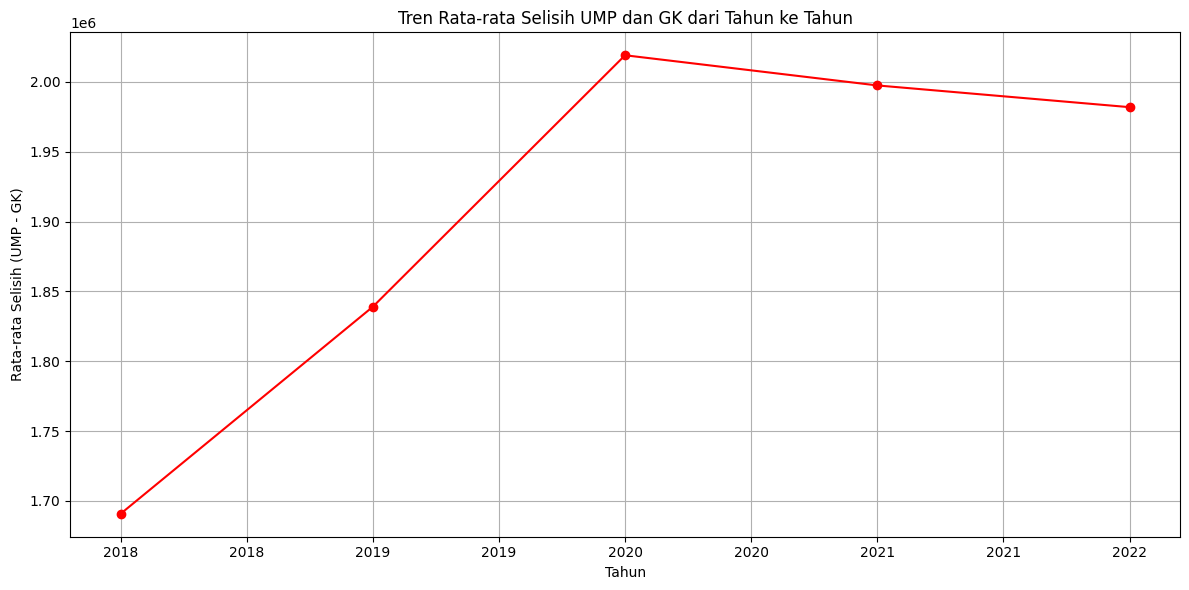

In [ ]:
from matplotlib.ticker import FuncFormatter

def format_year(x, pos):
    return int(x)  # atau format sesuai kebutuhan Anda

ax.xaxis.set_major_formatter(FuncFormatter(format_year))

# Hitung selisih antara UMP dan GK
df_cleaned['SELISIH'] = df_cleaned['UMP'] - df_cleaned['GK']

# Hitung rata-rata selisih per tahun
average_diff = df_cleaned.groupby('TAHUN')['SELISIH'].mean()

# Plot Grafik Garis Tren Selisih
fig, ax = plt.subplots(figsize=(12, 6))
average_diff.plot(kind='line', marker='o', ax=ax, color='red')

# Format sumbu X
ax.xaxis.set_major_formatter(FuncFormatter(format_year))

ax.set_title('Tren Rata-rata Selisih UMP dan GK dari Tahun ke Tahun')
ax.set_ylabel('Rata-rata Selisih (UMP - GK)')
ax.set_xlabel('Tahun')
plt.grid(True)

plt.tight_layout()
plt.show()

Rata-rata selisih antara UMP dan GK meningkat dari tahun 2018 hingga 2020, ini menunjukkan bahwa upah minimum meningkat lebih cepat dibandingkan garis kemiskinan, yang berarti peningkatan daya beli dan kesejahteraan pekerja. Ini juga mencerminkan kebijakan upah yang mungkin efektif dalam mengimbangi kenaikan biaya hidup. Namun, penting untuk terus memantau tren dan menilai apakah kenaikan ini cukup dan berkelanjutan untuk memenuhi kebutuhan masyarakat dalam jangka panjang. Namun rata-rata selisih antara UMP dan GK menurun dari tahun 2021 hingga 2022, ini menunjukkan bahwa upah minimum tidak meningkat sejalan dengan kebutuhan dasar yang meningkat, yang dapat mengurangi daya beli dan kesejahteraan pekerja. Penurunan ini mengindikasikan perlunya evaluasi kebijakan upah dan mungkin memerlukan intervensi tambahan untuk memastikan kesejahteraan masyarakat tetap terjaga. Evaluasi lebih lanjut dari faktor-faktor ekonomi dan kebijakan diperlukan untuk memahami dan mengatasi dampak penurunan ini secara efektif.

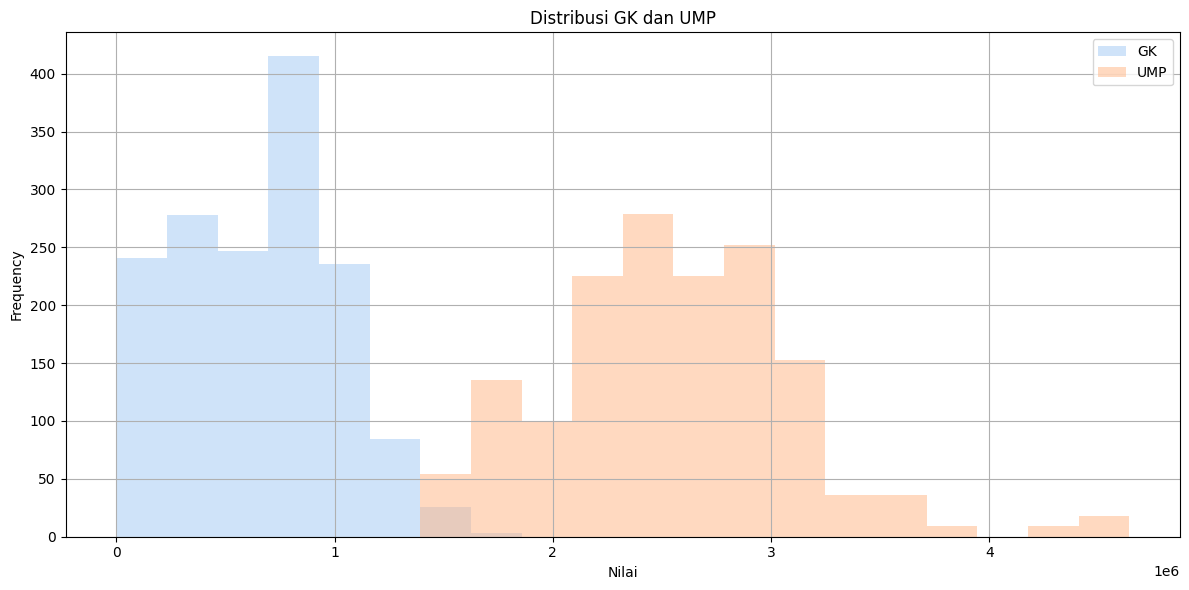

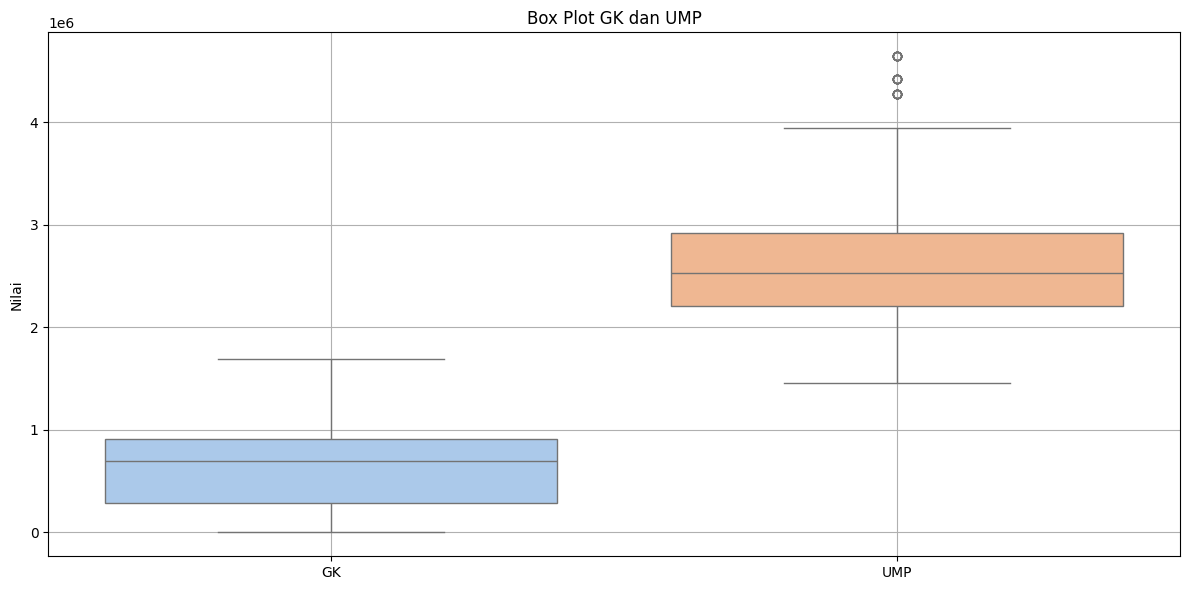

In [ ]:
# Plot Histogram UMP dan GK
fig, ax = plt.subplots(figsize=(12, 6))
df[['GK', 'UMP']].plot(kind='hist', bins=20, alpha=0.5, ax=ax)
ax.set_title('Distribusi GK dan UMP')
ax.set_xlabel('Nilai')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Box Plot UMP dan GK
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[['GK', 'UMP']], ax=ax)
ax.set_title('Box Plot GK dan UMP')
ax.set_ylabel('Nilai')
plt.grid(True)

plt.tight_layout()
plt.show()

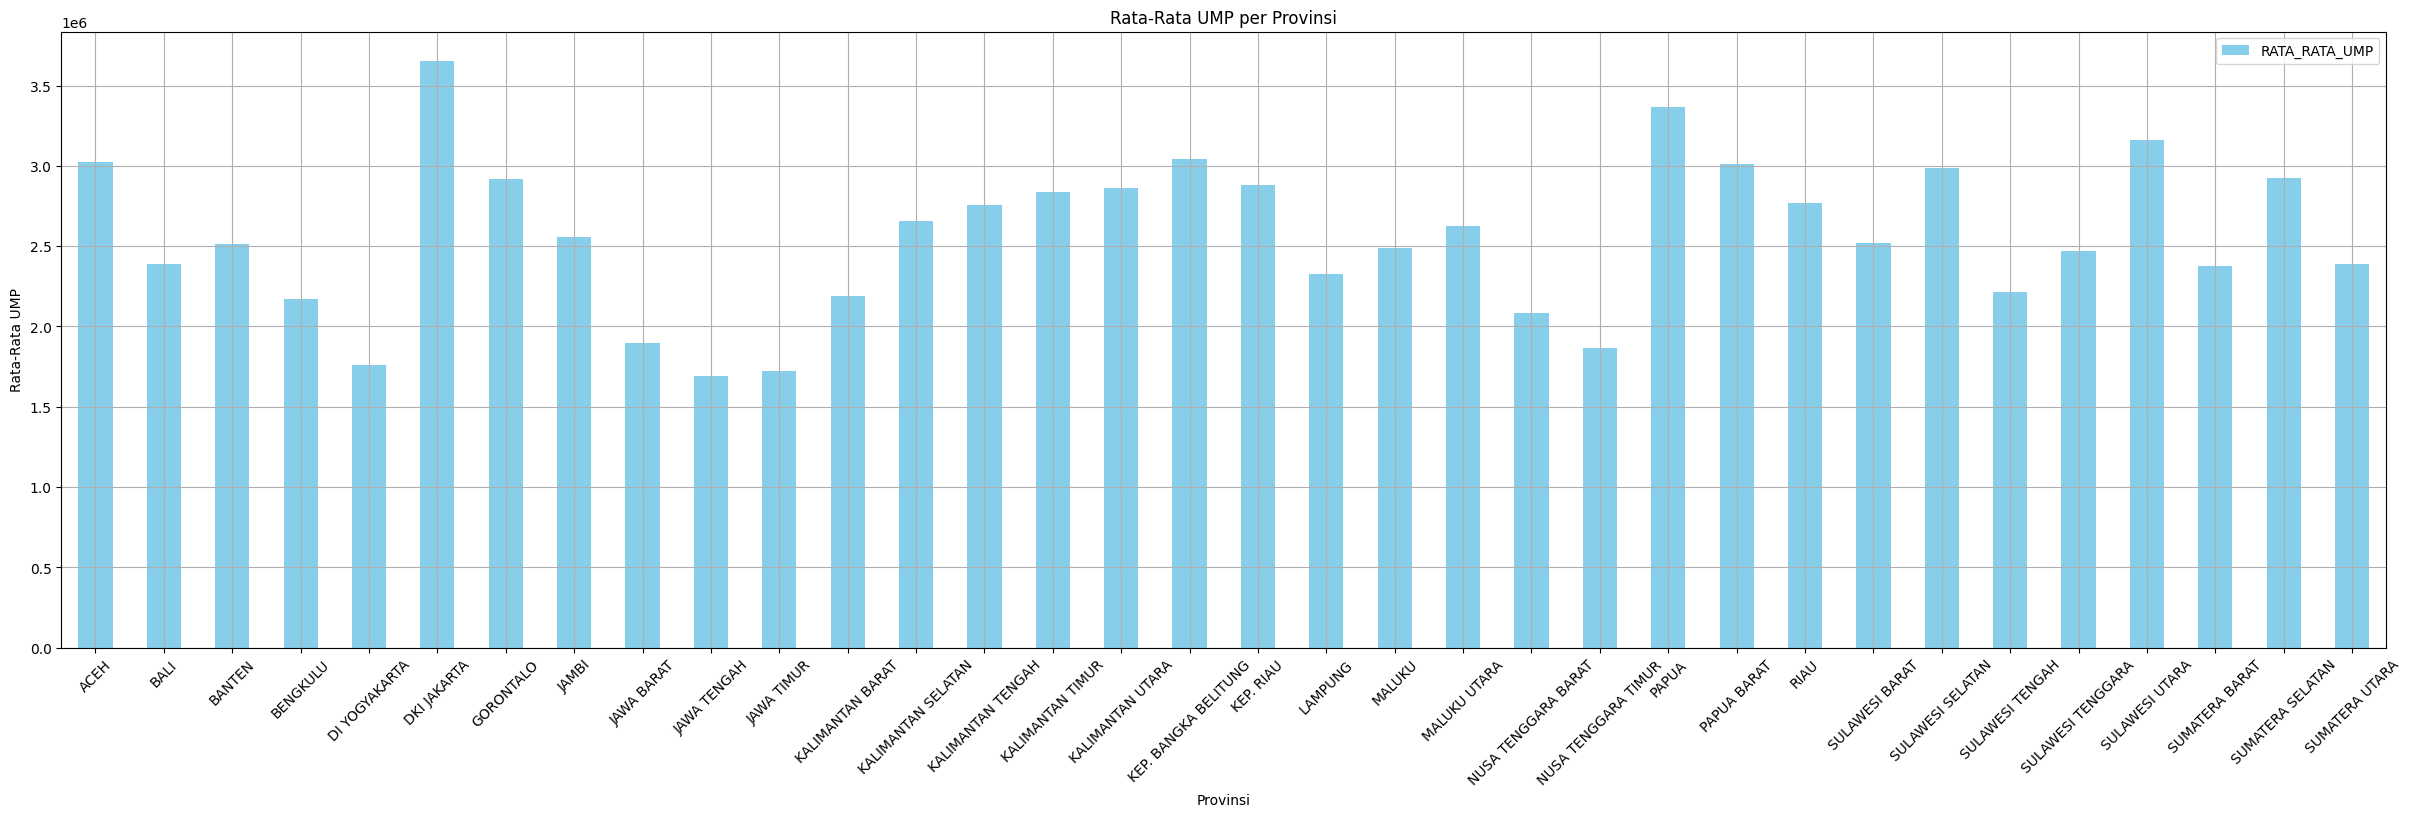

In [ ]:
# Hitung rata-rata UMP per provinsi
average_ump_per_provinsi = df.groupby('PROVINSI')['UMP'].mean().reset_index()
average_ump_per_provinsi.columns = ['PROVINSI', 'RATA_RATA_UMP']



# Plot Grafik Batang Rata-Rata UMP per Provinsi
fig, ax = plt.subplots(figsize=(30, 8))
average_ump_per_provinsi.plot(kind='bar', x='PROVINSI', y='RATA_RATA_UMP', ax=ax, color='skyblue')
ax.set_title('Rata-Rata UMP per Provinsi')
ax.set_xlabel('Provinsi')
ax.set_ylabel('Rata-Rata UMP')
plt.xticks(rotation=45)
plt.grid(True)

Rata-rata UMP yang tertinggi yaitu di provinsi DKI Jakarta, Papua, dan Sulawesi Utara dibandingkan dengan provinsi lain pada tahun 2018-2022. Hal ini bisa disebabkan oleh kombinasi faktor biaya hidup yang tinggi, kebutuhan ekonomi dan pasar tenaga kerja, kebijakan lokal, serta faktor sosial dan politik. Faktor-faktor ini bekerja bersama untuk mempengaruhi penetapan UMP di masing-masing provinsi, mencerminkan kebutuhan dan kondisi lokal yang berbeda.

In [ ]:
# Menghitung kolom 'SELISIH'
df_cleaned.loc[:, 'SELISIH'] = df_cleaned['PENG'] - df_cleaned['GK']

# Kemudian lakukan groupby
average_diff_per_provinsi = df_cleaned.groupby('PROVINSI')['SELISIH'].mean().reset_index()
average_diff_per_provinsi.columns = ['PROVINSI', 'RATA_RATA_SELISIH']
print(average_diff_per_provinsi)

                PROVINSI  RATA_RATA_SELISIH
0                   ACEH       41078.222222
1                   BALI      335390.555556
2                 BANTEN      274034.355556
3               BENGKULU       62858.622222
4          DI YOGYAKARTA      246866.644444
5            DKI JAKARTA      402202.622222
6              GORONTALO      222903.555556
7                  JAMBI      116486.177778
8             JAWA BARAT      275856.422222
9            JAWA TENGAH      144098.622222
10            JAWA TIMUR      149399.800000
11      KALIMANTAN BARAT      146869.644444
12    KALIMANTAN SELATAN      221769.444444
13     KALIMANTAN TENGAH      256572.400000
14      KALIMANTAN TIMUR      204270.066667
15      KALIMANTAN UTARA       73112.266667
16  KEP. BANGKA BELITUNG       31302.822222
17             KEP. RIAU      227658.422222
18               LAMPUNG       64513.400000
19                MALUKU      -20912.888889
20          MALUKU UTARA      135650.444444
21   NUSA TENGGARA BARAT      16

In [ ]:
# Identifikasi daerah dengan kesenjangan signifikan
kesenjangan_signifikan = average_diff_per_provinsi[average_diff_per_provinsi['RATA_RATA_SELISIH'] < 0]

print(kesenjangan_signifikan)

   PROVINSI  RATA_RATA_SELISIH
19   MALUKU      -20912.888889


Hasil ini menunjukkan bahwa provinsi Maluku mengalami kesenjangan signifikan antara pengeluaran dan garis kemiskinan, dengan rata-rata pengeluaran yang jauh di bawah garis kemiskinan. Ini menandakan adanya masalah ekonomi yang serius di wilayah tersebut, di mana pengeluaran rata-rata tidak mencukupi untuk memenuhi kebutuhan dasar. Pemerintah dan pembuat kebijakan perlu mempertimbangkan penyesuaian dalam kebijakan upah, dukungan sosial, dan perencanaan ekonomi untuk mengatasi kesenjangan ini dan meningkatkan kesejahteraan masyarakat di Maluku.


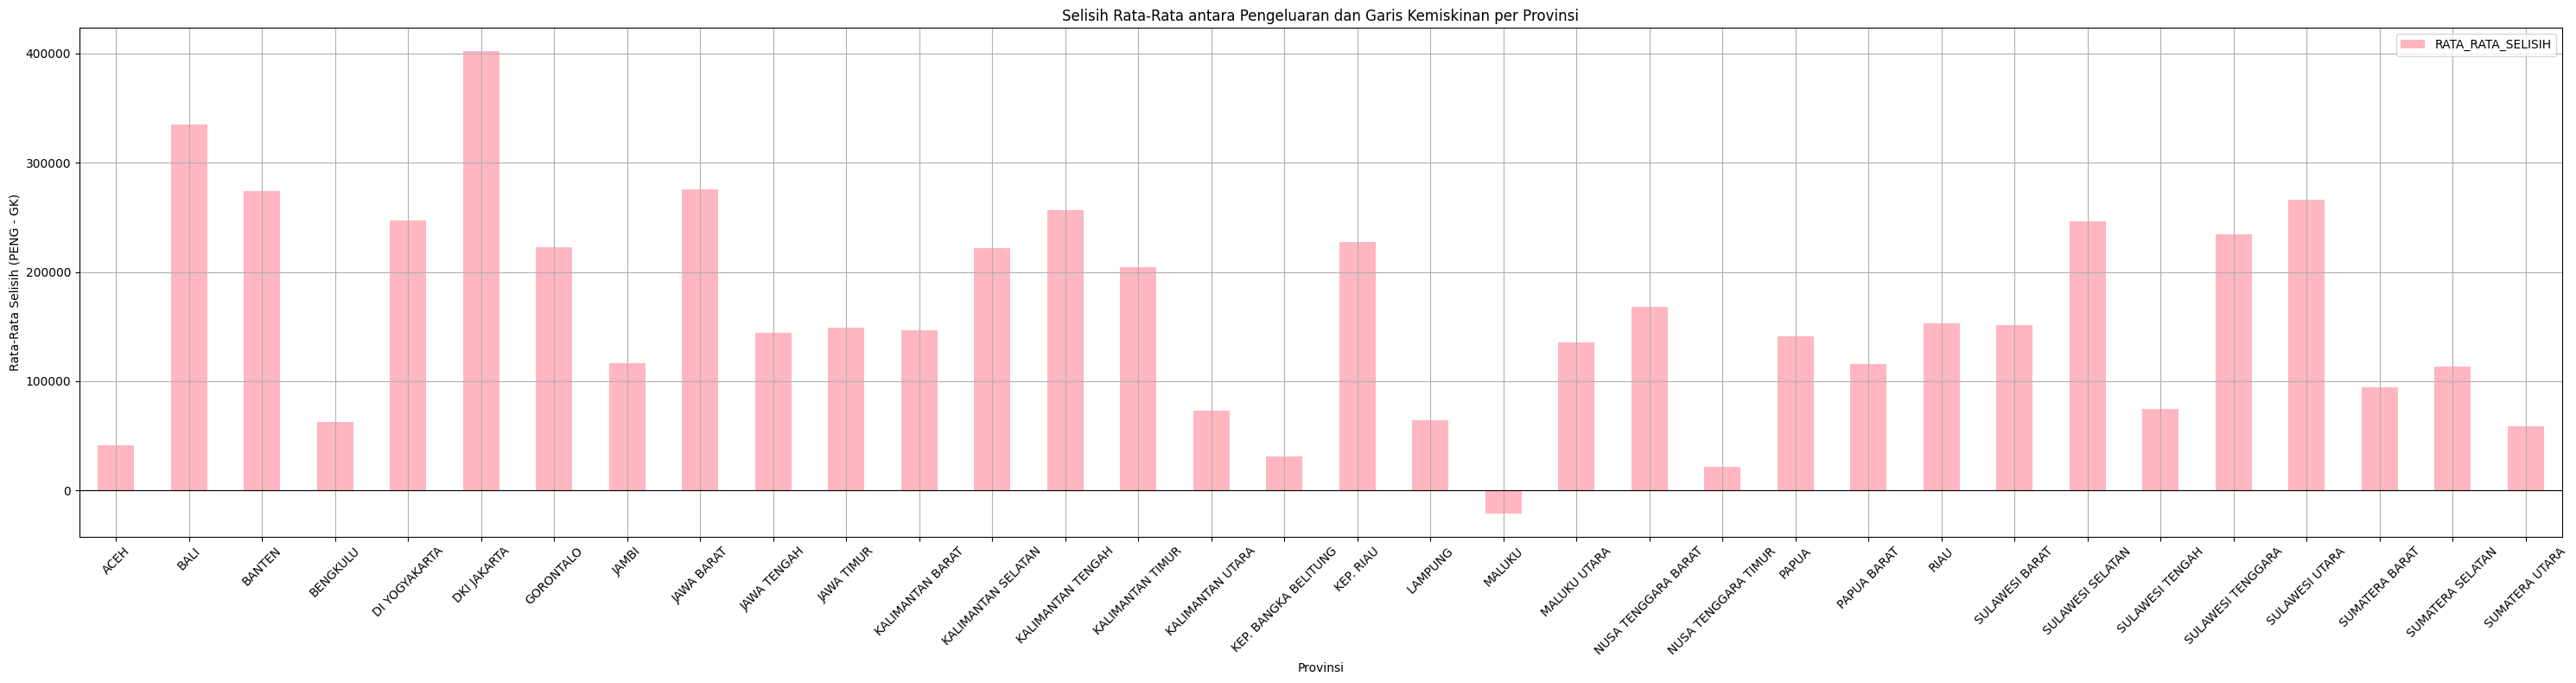

In [ ]:
# Plot Grafik Batang Selisih
fig, ax = plt.subplots(figsize=(30, 8))
average_diff_per_provinsi.plot(kind='bar', x='PROVINSI', y='RATA_RATA_SELISIH', ax=ax, color='lightpink')
ax.set_title('Selisih Rata-Rata antara Pengeluaran dan Garis Kemiskinan per Provinsi')
ax.set_xlabel('Provinsi')
ax.set_ylabel('Rata-Rata Selisih (PENG - GK)')
plt.axhline(0, color='black', linewidth=0.8)  # Tambahkan garis horizontal di nol
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Nilai tertinggi dari grafik selisih rata-rata yaitu di provinsi Bali, DKI Jakarta, dan Jawa Barat. Hal ini menunjukkan bahwa di ketiga provinsi ini dalam pengeluaran rata-ratanya telah melebihi garis kemiskinan, yang mengindikasikan bahwa masyarakat di provinsi-provinsi ini secara umum memiliki daya beli yang lebih baik. Namun, ini juga menunjukkan perlunya pemantauan dan evaluasi terus-menerus terkait kebijakan ekonomi dan sosial untuk memastikan bahwa pertumbuhan ekonomi yang positif dapat dirasakan secara adil oleh semua anggota masyarakat.

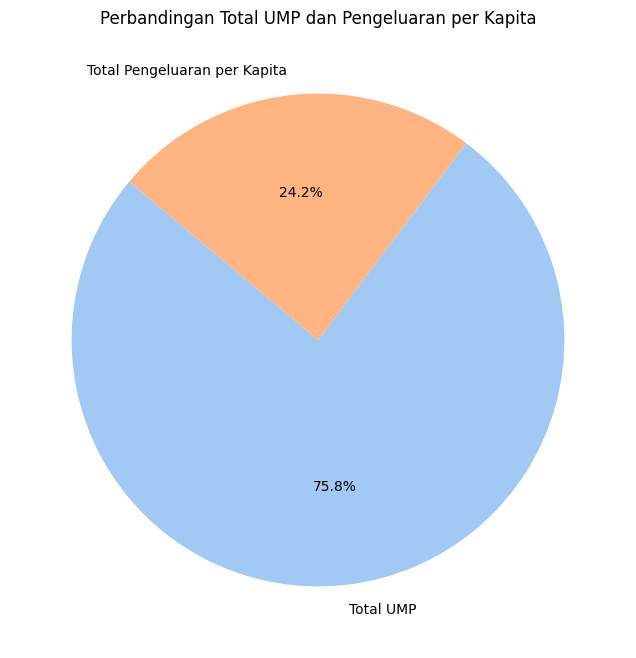

In [ ]:
# Menghitung total UMP dan Pengeluaran per Kapita
total_ump = df_cleaned['UMP'].sum()
total_peng = df_cleaned['PENG'].sum()

# Mengatur ukuran plot
plt.figure(figsize=(8, 8))

# Data untuk diagram lingkaran
labels = ['Total UMP', 'Total Pengeluaran per Kapita']
sizes = [total_ump, total_peng]

# Membuat diagram lingkaran
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Total UMP dan Pengeluaran per Kapita')

plt.show()

Nilai persentase UMP lebih besar dibandingkan dengan pengeluaran per kapita, ini umumnya menunjukkan bahwa upah minimum yang diterima di provinsi tersebut lebih dari cukup untuk menutupi rata-rata pengeluaran per kapita. Ini bisa menandakan kondisi ekonomi yang lebih baik bagi pekerja, memberikan indikasi bahwa mereka memiliki daya beli yang lebih besar dan kesejahteraan yang relatif lebih tinggi. Namun, penting juga untuk mempertimbangkan faktor-faktor lain seperti variasi dalam pengeluaran individu dan biaya hidup spesifik di daerah tersebut.


In [ ]:
# Menghitung korelasi antara UMP dan Pengeluaran per Kapita
correlation = df_cleaned[['UMP', 'PENG']].corr().iloc[0, 1]
print(f"Korelasi antara UMP dan Pengeluaran per Kapita: {correlation:.2f}")

Korelasi antara UMP dan Pengeluaran per Kapita: 0.18


Korelasi sebesar 0.18 antara UMP dan Pengeluaran per Kapita menunjukkan adanya hubungan positif yang sangat lemah. Ini berarti bahwa meskipun ada sedikit kecenderungan bahwa perubahan dalam UMP mungkin mempengaruhi pengeluaran per kapita, hubungan tersebut tidak cukup kuat untuk memberikan wawasan yang signifikan atau menjadi faktor utama dalam pengeluaran per kapita. Faktor-faktor lain mungkin memainkan peran yang lebih besar dalam menentukan pengeluaran per kapita di suatu daerah.

In [ ]:
# Menghitung koefisien korelasi
correlation = df_cleaned[['GK', 'PENG']].corr().iloc[0, 1]
print(f'Koefisien Korelasi antara GK dan PENG: {correlation:.2f}')

Koefisien Korelasi antara GK dan PENG: 0.72


Koefisien korelasi 0.72 antara Garis Kemiskinan (GK) dan Pengeluaran (PENG) menunjukkan adanya hubungan positif yang kuat. Ini berarti bahwa perubahan dalam garis kemiskinan cenderung diikuti oleh perubahan dalam pengeluaran, dan keduanya berkorelasi erat. Hubungan ini mencerminkan bahwa pengeluaran sering disesuaikan berdasarkan garis kemiskinan, dan mungkin memerlukan perhatian dalam perencanaan kebijakan ekonomi dan sosial untuk memastikan kesejahteraan masyarakat yang memadai.

<ipython-input-40-94ba26ddfe73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['kemiskinan'] = np.where(df_cleaned['PENG'] < df_cleaned['GK'], 1, 0)
<ipython-input-40-94ba26ddfe73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['persentase_kemiskinan'] = df_cleaned['kemiskinan'] * 100


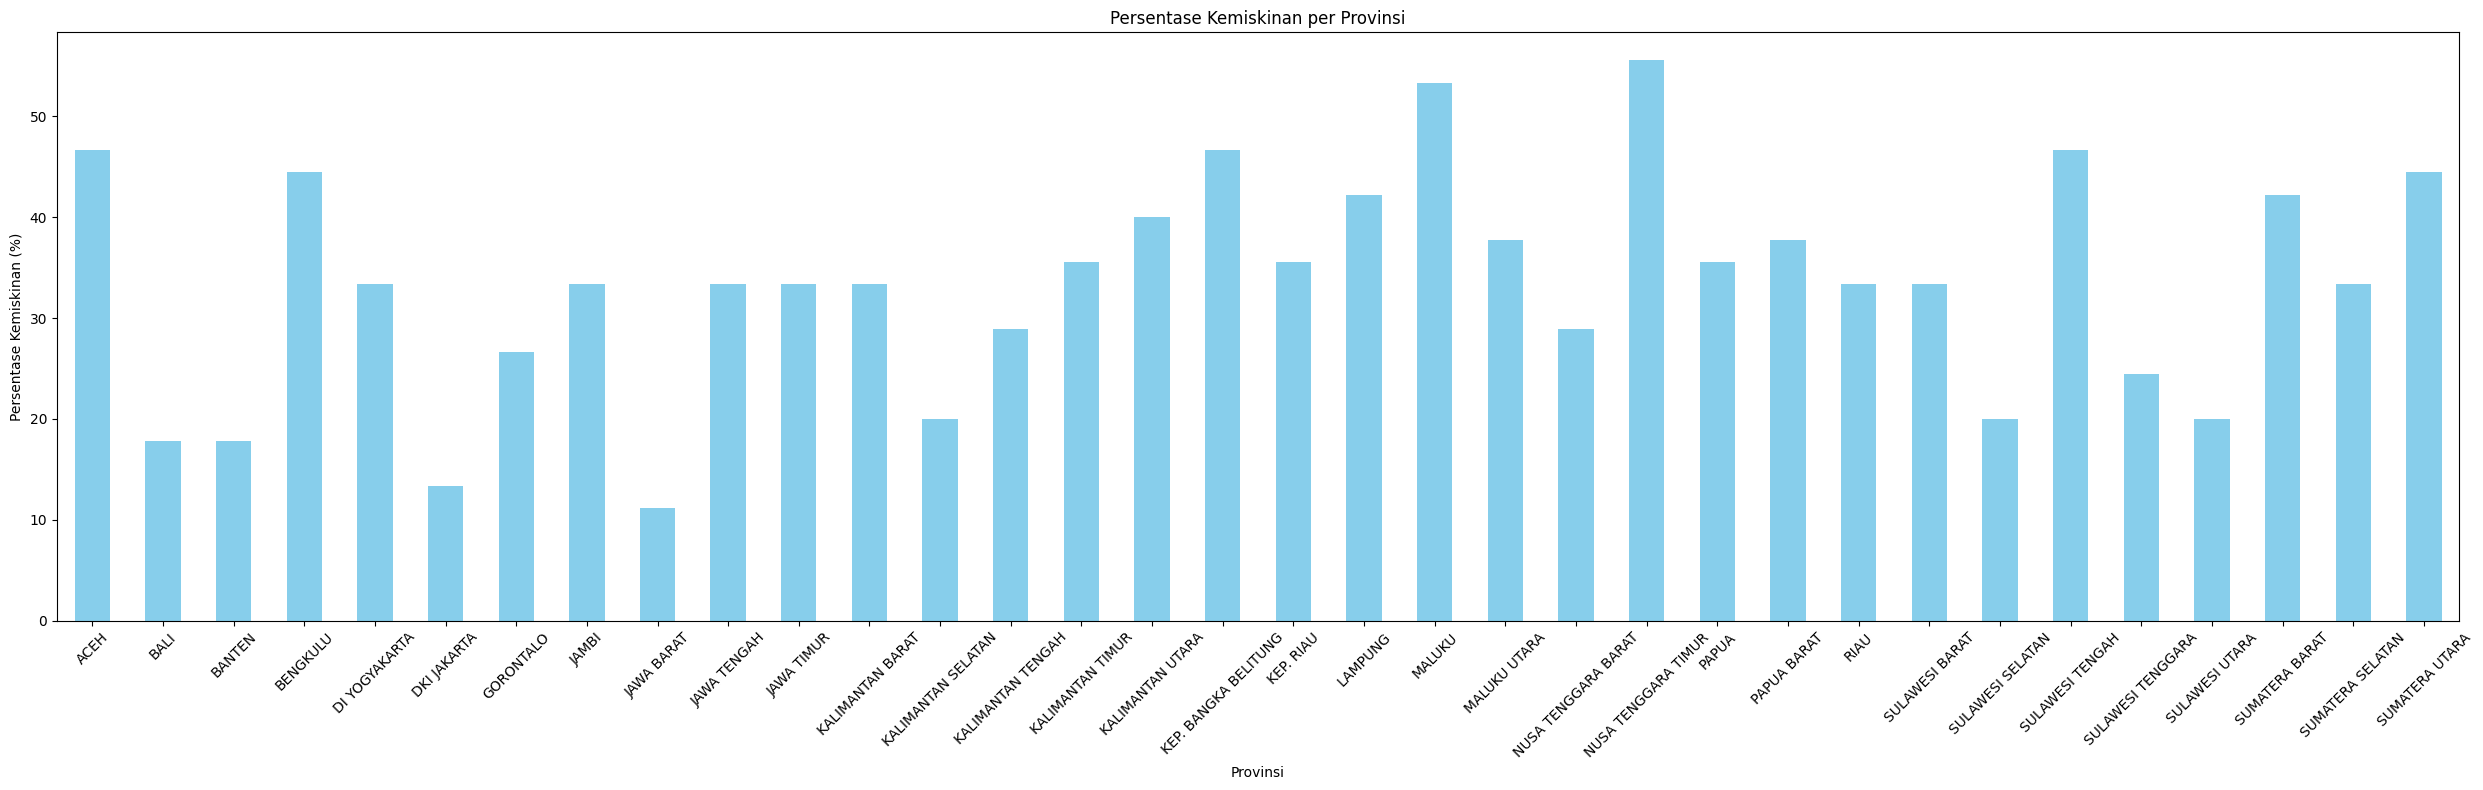

In [ ]:
# ANALISIS INDEKS KEMISKINAN
# Menghitung apakah pengeluaran per kapita di bawah garis kemiskinan
df_cleaned['kemiskinan'] = np.where(df_cleaned['PENG'] < df_cleaned['GK'], 1, 0)

# Menghitung persentase penduduk di bawah garis kemiskinan
df_cleaned['persentase_kemiskinan'] = df_cleaned['kemiskinan'] * 100

# Menghitung rata-rata kemiskinan per provinsi
kemiskinan_percentage = df_cleaned.groupby('PROVINSI')['persentase_kemiskinan'].mean()


# Visualisasi
plt.figure(figsize=(25, 8))
kemiskinan_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Provinsi')
plt.ylabel('Persentase Kemiskinan (%)')
plt.title('Persentase Kemiskinan per Provinsi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari tahun 2018-2022, diperoleh bahwa persentase kemiskinan yang tertinggi di Indonesia adalah Nusa Tenggara Timur dan Maluku. Ini menunjukkan bahwa banyak penduduk dikedua provinsi mengalami kesulitan ekonomi yang signifikan, sehingga memerlukan perhatian khusus dalam perencanaan kebijakan dan intervensi untuk mengurangi kemiskinan dan meningkatkan kesejahteraan. Upaya yang lebih besar dari pemerintah dan sektor swasta, serta pendekatan yang lebih fokus pada pengembangan ekonomi lokal dan sosial, dapat membantu mengatasi masalah kemiskinan yang tinggi di daerah-daerah tersebut.